# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress

# Import API key
from config import weather_api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [2]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

613

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [3]:
#print(cities[-1])
# print(city)
url = "http://api.openweathermap.org/data/2.5/weather?"
city_q= "henties bay"
unit= "imperial"
query_url= f"{url}q={city_q}&units={unit}&appid={weather_api_key}"
response= requests.get(query_url).json()
print(response)
# print(response['main']['temp'])
# print(response['main']['humidity'])
# print(response['wind']['speed'])
# print(response['clouds']['all'])
# print(response['id'])

{'coord': {'lon': 14.2845, 'lat': -22.116}, 'weather': [{'id': 802, 'main': 'Clouds', 'description': 'scattered clouds', 'icon': '03n'}], 'base': 'stations', 'main': {'temp': 64.99, 'feels_like': 67.23, 'temp_min': 64.99, 'temp_max': 64.99, 'pressure': 1014, 'humidity': 89}, 'visibility': 10000, 'wind': {'speed': 3, 'deg': 319, 'gust': 5.99}, 'clouds': {'all': 34}, 'dt': 1612557575, 'sys': {'type': 3, 'id': 2012545, 'country': 'NA', 'sunrise': 1612500395, 'sunset': 1612547230}, 'timezone': 7200, 'id': 3356832, 'name': 'Henties Bay', 'cod': 200}


In [4]:
url = "http://api.openweathermap.org/data/2.5/weather?"
unit= "imperial"
city_name= []
city_id= []
temp= []
humidity= []
wind= []
cloudiness= []
latitude= []
longitude= []
country= []
counter = 0
set_v= 1
for city in cities:
    try:
        query_url= f"{url}&q={city}&units={unit}&appid={weather_api_key}"
        response= requests.get(query_url).json()
        city_name_v= response['name']
        city_name.append(city_name_v)
        city_id_v= response['id']
        city_id.append(city_id_v)
        temp_v=response['main']['temp_max']
        temp.append(temp_v)
        humidity_v= response['main']['humidity']
        humidity.append(humidity_v)
        wind_v= response['wind']['speed']
        wind.append(wind_v)
        cloudiness_v= response['clouds']['all']
        cloudiness.append(cloudiness_v)
        latitude_v= response['coord']['lat']
        latitude.append(latitude_v)
        longitude_v= response['coord']['lon']
        longitude.append(longitude_v)
        country_v= response['sys']['country']
        country.append(country_v)
        counter= counter +1
        print(f"Recording Record of {counter} of Set {set_v}: {city_name_v} ")
        if counter == 51:
            set_v= set_v+1
            counter= 0
            
    except:
        print("City not found. Skipping...")
# print(humidity)
# print(temp)
# print(wind)
# print(cloudiness)

Recording Record of 1 of Set 1: Arraial do Cabo 
Recording Record of 2 of Set 1: Turinsk 
Recording Record of 3 of Set 1: Gdov 
City not found. Skipping...
Recording Record of 4 of Set 1: Busselton 
Recording Record of 5 of Set 1: Jamestown 
Recording Record of 6 of Set 1: Manokwari 
Recording Record of 7 of Set 1: Half Moon Bay 
Recording Record of 8 of Set 1: Bandarbeyla 
City not found. Skipping...
Recording Record of 9 of Set 1: Barrow 
Recording Record of 10 of Set 1: Port Blair 
City not found. Skipping...
Recording Record of 11 of Set 1: Saquena 
Recording Record of 12 of Set 1: Tasiilaq 
Recording Record of 13 of Set 1: Punta Arenas 
Recording Record of 14 of Set 1: Narsaq 
Recording Record of 15 of Set 1: Hithadhoo 
Recording Record of 16 of Set 1: Hong Kong 
Recording Record of 17 of Set 1: Leh 
Recording Record of 18 of Set 1: Ushuaia 
Recording Record of 19 of Set 1: Chui 
Recording Record of 20 of Set 1: Ucluelet 
Recording Record of 21 of Set 1: Albany 
Recording Record o

Recording Record of 22 of Set 4: Thompson 
Recording Record of 23 of Set 4: Mnogovershinnyy 
Recording Record of 24 of Set 4: Malakal 
City not found. Skipping...
Recording Record of 25 of Set 4: Geraldton 
Recording Record of 26 of Set 4: Yibin 
Recording Record of 27 of Set 4: Paramonga 
Recording Record of 28 of Set 4: Talcahuano 
Recording Record of 29 of Set 4: Sakakah 
Recording Record of 30 of Set 4: Nome 
City not found. Skipping...
Recording Record of 31 of Set 4: Khuzhir 
Recording Record of 32 of Set 4: Galveston 
Recording Record of 33 of Set 4: Aswān 
Recording Record of 34 of Set 4: Ribeira Grande 
Recording Record of 35 of Set 4: San Matías 
City not found. Skipping...
Recording Record of 36 of Set 4: Darnah 
Recording Record of 37 of Set 4: Eskişehir 
Recording Record of 38 of Set 4: Noumea 
Recording Record of 39 of Set 4: Hūn 
Recording Record of 40 of Set 4: Mamlyutka 
Recording Record of 41 of Set 4: Brigantine 
Recording Record of 42 of Set 4: Poum 
Recording Recor

Recording Record of 50 of Set 7: Illapel 
Recording Record of 51 of Set 7: Phan Thiet 
Recording Record of 1 of Set 8: Banamba 
Recording Record of 2 of Set 8: Colón 
Recording Record of 3 of Set 8: Hambantota 
Recording Record of 4 of Set 8: Kaa-Khem 
Recording Record of 5 of Set 8: Blackwater 
Recording Record of 6 of Set 8: Meulaboh 
Recording Record of 7 of Set 8: Bariloche 
Recording Record of 8 of Set 8: Thaba Nchu 
Recording Record of 9 of Set 8: Faya 
Recording Record of 10 of Set 8: Nuuk 
Recording Record of 11 of Set 8: Alcaudete 
City not found. Skipping...
Recording Record of 12 of Set 8: Neuquén 
Recording Record of 13 of Set 8: Minna 
Recording Record of 14 of Set 8: Grand Gaube 
Recording Record of 15 of Set 8: Devonport 
Recording Record of 16 of Set 8: Kodinsk 
Recording Record of 17 of Set 8: Whitley Bay 
City not found. Skipping...
Recording Record of 18 of Set 8: Agartala 
City not found. Skipping...
Recording Record of 19 of Set 8: Chitral 
Recording Record of 20 o

Recording Record of 26 of Set 11: Zhireken 
Recording Record of 27 of Set 11: Gambēla 
Recording Record of 28 of Set 11: Quatre Cocos 
City not found. Skipping...
Recording Record of 29 of Set 11: Shelburne 
Recording Record of 30 of Set 11: Olinda 
Recording Record of 31 of Set 11: Sangmélima 
Recording Record of 32 of Set 11: Alamosa 
City not found. Skipping...
Recording Record of 33 of Set 11: Vilhena 
Recording Record of 34 of Set 11: Sainte-Agathe-des-Monts 
Recording Record of 35 of Set 11: Värnamo 
Recording Record of 36 of Set 11: Ouadda 
Recording Record of 37 of Set 11: Kailua 
Recording Record of 38 of Set 11: Alūksne 
Recording Record of 39 of Set 11: Bosaso 
Recording Record of 40 of Set 11: Las Margaritas 
Recording Record of 41 of Set 11: Tura 
Recording Record of 42 of Set 11: Matinha 
Recording Record of 43 of Set 11: Igrim 
Recording Record of 44 of Set 11: Meadow Lake 
Recording Record of 45 of Set 11: Necochea 
Recording Record of 46 of Set 11: Kavaratti 
Recording

In [22]:
weather_df= pd.DataFrame({"City Name" : city_name})
weather_df["City ID"]= city_id
weather_df["Latitude"]= latitude
weather_df["Longitude"]= longitude
#alt + 0176 is degree symbol
weather_df["Temp °F"]= temp
weather_df["Humidity %"]= humidity
weather_df["Wind Speed (mph)"]= wind
weather_df["Cloudiness %"]= cloudiness
weather_df["Country"]= country
weather_df
   


,City Name,City ID,Latitude,Longitude,Temp °F,Humidity %,Wind Speed (mph),Cloudiness %,Country
0,Arraial do Cabo,3471451,-22.9661,-42.0278,78.80,83,10.36,75,BR
1,Turinsk,1488933,58.0458,63.6960,34.21,97,12.03,100,RU
2,Gdov,561679,58.7406,27.8122,4.73,94,4.47,90,RU
3,Busselton,2075265,-33.6500,115.3333,57.99,78,1.01,100,AU
4,Jamestown,5122534,42.0970,-79.2353,27.00,63,21.85,90,US
...,...,...,...,...,...,...,...,...,...
554,Necochea,3430443,-38.5473,-58.7368,82.71,24,6.42,0,AR
555,Kavaratti,1267390,10.5669,72.6420,80.40,77,12.95,0,IN
556,The Valley,3573374,18.2170,-63.0578,82.40,65,16.11,20,AI
557,Karaton,1630058,-6.3424,106.1045,80.60,78,9.22,75,ID


### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [23]:
weather_df.to_csv("Weather_df.csv",index=False)

## Inspect the data and remove the cities where the humidity > 100%.
----
Skip this step if there are no cities that have humidity > 100%. 

In [7]:
impossible=weather_df.loc[weather_df["Humidity %"] > 100]
impossible



,City Name,City ID,Latitude,Longitude,Temp °F,Humidity %,Wind Speed (mph),Cloudiness %


In [8]:
#  Get the indices of cities that have humidity over 100%.


In [9]:
# Make a new DataFrame equal to the city data to drop all humidity outliers by index.
# Passing "inplace=False" will make a copy of the city_data DataFrame, which we call "clean_city_data".


## Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

## Latitude vs. Temperature Plot

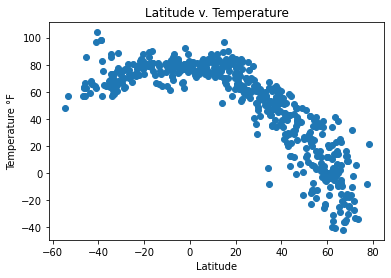

In [10]:
plt.scatter(weather_df['Latitude'],weather_df['Temp °F'])
plt.xlabel("Latitude")
plt.ylabel("Temperature °F")
plt.title("Latitude v. Temperature")
plt.show()

## Latitude vs. Humidity Plot

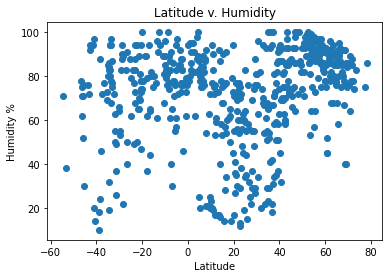

In [11]:
plt.scatter(weather_df["Latitude"],weather_df["Humidity %"])
plt.xlabel("Latitude")
plt.ylabel("Humidity %")
plt.title("Latitude v. Humidity")
plt.show()

## Latitude vs. Cloudiness Plot

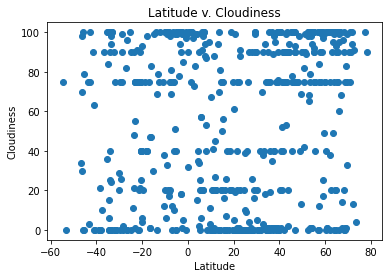

In [12]:
plt.scatter(weather_df["Latitude"],weather_df['Cloudiness %'])
plt.xlabel("Latitude")
plt.ylabel("Cloudiness")
plt.title("Latitude v. Cloudiness")
plt.show()

## Latitude vs. Wind Speed Plot

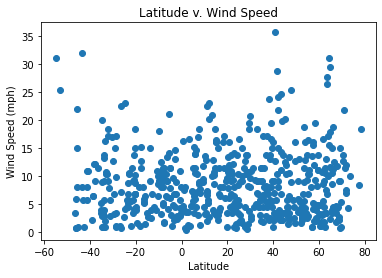

In [13]:
plt.scatter(weather_df["Latitude"],weather_df["Wind Speed (mph)"])
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (mph)")
plt.title("Latitude v. Wind Speed")
plt.show()

## Linear Regression

####  Northern Hemisphere - Max Temp vs. Latitude Linear Regression

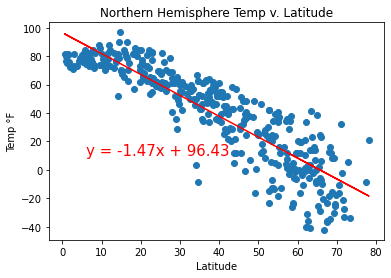

In [14]:
x_check= weather_df.loc[weather_df["Latitude"] > 0]
# print(x_check)
x_values= x_check['Latitude']
y_values= x_check['Temp °F']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(6,10),fontsize=15,color="red")
plt.xlabel("Latitude")
plt.ylabel("Temp °F")
plt.title("Northern Hemisphere Temp v. Latitude")
plt.show()

####  Southern Hemisphere - Max Temp vs. Latitude Linear Regression

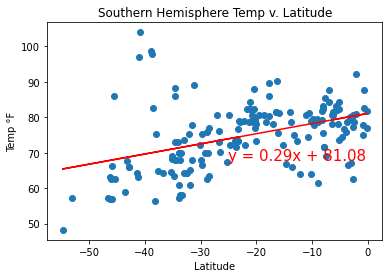

In [15]:
x_check= weather_df.loc[weather_df["Latitude"] < 0]
# print(x_check)
x_values= x_check['Latitude']
y_values= x_check['Temp °F']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(-25,68),fontsize=15,color="red")
plt.xlabel("Latitude")
plt.ylabel("Temp °F")
plt.title("Southern Hemisphere Temp v. Latitude")
plt.show()

####  Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

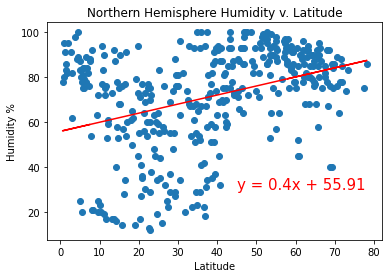

In [16]:
x_check= weather_df.loc[weather_df["Latitude"] > 0]
x_values= x_check['Latitude']
y_values= x_check['Humidity %']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(45,30),fontsize=15,color="red")
plt.xlabel("Latitude")
plt.ylabel("Humidity %")
plt.title("Northern Hemisphere Humidity v. Latitude")
plt.show()

####  Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

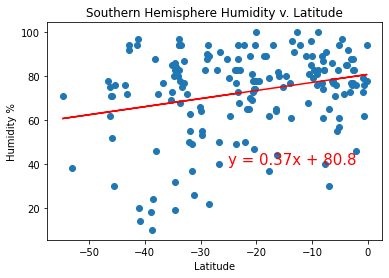

In [17]:
x_check= weather_df.loc[weather_df["Latitude"] < 0]
# print(x_check)
x_values= x_check['Latitude']
y_values= x_check['Humidity %']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(-25,40),fontsize=15,color="red")
plt.xlabel("Latitude")
plt.ylabel("Humidity %")
plt.title("Southern Hemisphere Humidity v. Latitude")
plt.show()

####  Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

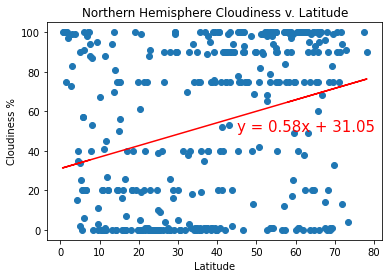

In [18]:
x_check= weather_df.loc[weather_df["Latitude"] > 0]
x_values= x_check['Latitude']
y_values= x_check['Cloudiness %']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(45,50),fontsize=15,color="red")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness %")
plt.title("Northern Hemisphere Cloudiness v. Latitude")
plt.show()

####  Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

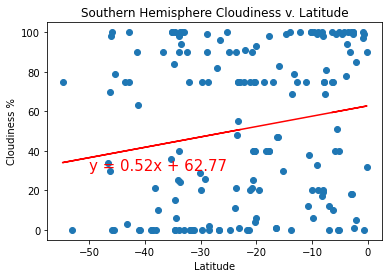

In [19]:
x_check= weather_df.loc[weather_df["Latitude"] < 0]
# print(x_check)
x_values= x_check['Latitude']
y_values= x_check['Cloudiness %']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(-50,30),fontsize=15,color="red")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness %")
plt.title("Southern Hemisphere Cloudiness v. Latitude")
plt.show()

####  Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

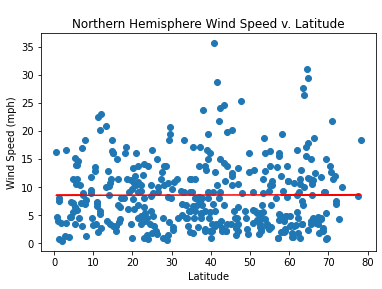

In [20]:
x_check= weather_df.loc[weather_df["Latitude"] > 0]
x_values= x_check['Latitude']
y_values= x_check['Wind Speed (mph)']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(6,40),fontsize=15,color="red")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (mph)")
plt.title("Northern Hemisphere Wind Speed v. Latitude")
plt.show()

####  Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

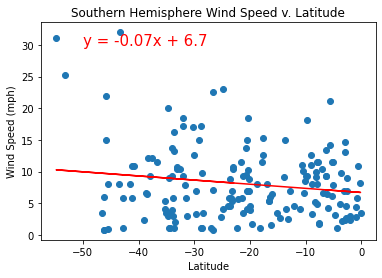

In [21]:
x_check= weather_df.loc[weather_df["Latitude"] < 0]
# print(x_check)
x_values= x_check['Latitude']
y_values= x_check['Wind Speed (mph)']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(-50,30),fontsize=15,color="red")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (mph)")
plt.title("Southern Hemisphere Wind Speed v. Latitude")
plt.show()